In [109]:
# Jonathan Plavnik, CMOR220, Fall 2025, Project 9
# project9_evolutionary_game_theory.ipynb
#
# Last modified: December 12, 2025

# Imports
import matplotlib.pyplot as plt
import numpy as np
import math

In [110]:
def evo(M,N,b,rounds):
  A = np.ones((M,N))
  A[int(M/2), int(N/2)] = 0
  A_current = np.copy(A)
  fraction_cooperators = []

  for i in range(rounds):
    S = score(A_current,b)
    An, frac = advance(S, A)
    fraction_cooperators.append(frac)
    A_current = np.copy(An)

  # plot what fraction of the board is cooperators ie 1
  plt.figure()
  plt.plot(fraction_cooperators)
  plt.xlabel('Rounds')
  plt.ylabel('Fraction of cooperators')
  plt.title(f'M = {M}, N = {N}')
  plt.ylim(0, 1)
  plt.xlim(0, rounds)

  # plot color version of 2d plot of the board
  evodisp(A, An)



In [111]:
def score(A, b):
    M, N = A.shape
    S = np.zeros((M, N))

    # iterate over whole matrix
    for i in range(M):
        for j in range(N):
            se = A[i, j]
            s = 0

            # iterate over 3×3 neighborhood
            for di in (-1, 0, 1):
                for dj in (-1, 0, 1):
                    ni = (i + di) % M
                    nj = (j + dj) % N
                    val = A[ni, nj]

                    if se == 1 and val == 1: # both cooperators, add 1
                        s += 1
                    elif se == 0 and val == 1: # point is defector while other is cooperator, add b
                        s += b
            S[i, j] = s
    return S

In [112]:
def advance(S, A):
    M, N = A.shape
    An = np.zeros((M, N))

    for i in range(M):
        for j in range(N):

            # Neighborhood score window (3×3)
            scores = np.zeros((3, 3))
            states = np.zeros((3, 3))

            for di in (-1, 0, 1):
                for dj in (-1, 0, 1):
                    ni = (i + di) % M
                    nj = (j + dj) % N
                    scores[di+1, dj+1] = S[ni, nj]
                    states[di+1, dj+1] = A[ni, nj]

            # find max score
            r, c = np.where(scores == np.max(scores))
            An[i, j] = states[r[0], c[0]]

    # compute fraction of cooperators in the grid
    fraction_cooperators = np.mean(An == 1)

    return An, fraction_cooperators


In [113]:
def evodisp(A, An):
  M, N = np.shape(A)
  D = np.zeros((M, N, 3))
  for i in range(M):
      for j in range(N):
          if A[i, j] == 1 and An[i, j] == 1:     # Blue
                D[i, j, 0:3] = [0, 0, 1]
          elif A[i, j] == 0 and An[i, j] == 0:   # Red
                D[i, j, 0:3] = [1, 0, 0]
          elif A[i, j] == 1 and An[i, j] == 0:   # Yellow
                D[i, j, 0:3] = [1, 1, 0]
          elif A[i, j] == 0 and An[i, j] == 1:   # Green
                D[i, j, 0:3] = [0, 1, 0]
  plt.figure()
  plt.imshow(D)
  plt.axis("equal")


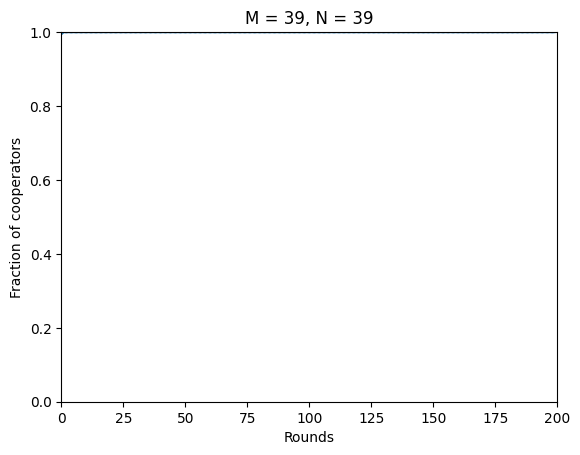

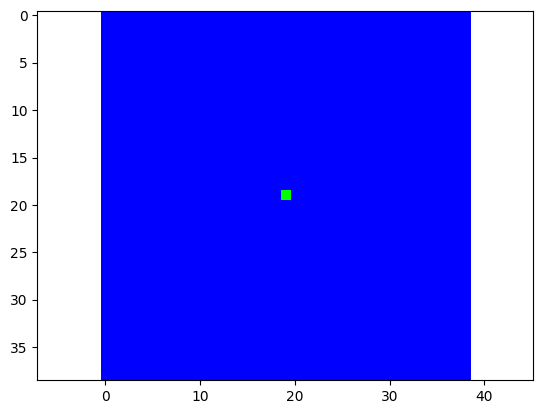

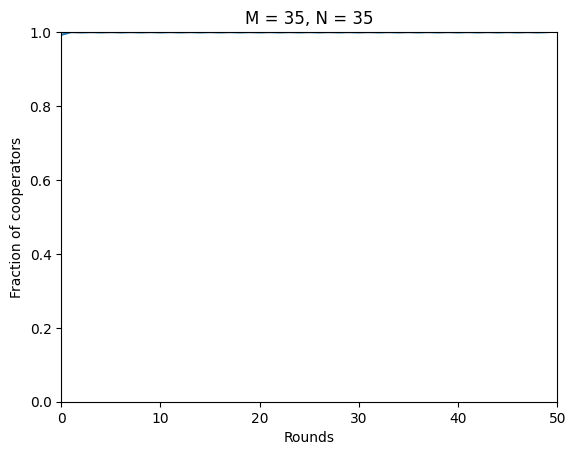

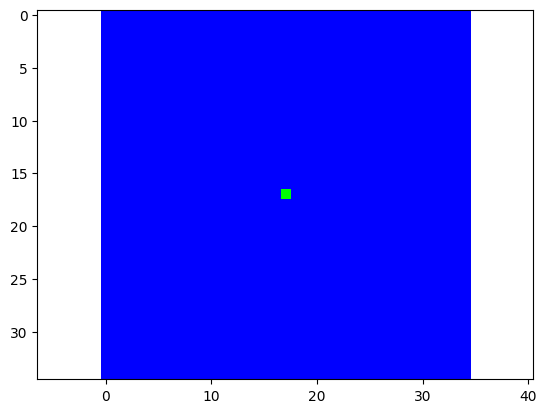

In [114]:
# run scenarios as outlined in pdf
evo(39, 39, 1.9, 200)
evo(35, 35, 1.9, 50)

# Response to questions
# What is different about the outcome of this game?
# What would happen if we played more rounds?